In [1]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import scipy

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

import scipy.io
import time
import glob,os
import cv2
from scipy import optimize
from pylab import *

import imutils
import cv2
import csv

### Read accurate positions and peak positions from CSV and TXT file

In [8]:
Folder_list = ['LargeRegY','RatioLimit','RawSym','RawAsy']
precision_x = np.zeros((len(Folder_list),6))
precision_y = np.zeros((len(Folder_list),6))
for ifolder in range(len(Folder_list)):
    print(Folder_list[ifolder])
    for isubfolder in range(6):
        csvfile = '/srv/home/chenyu/JDDC/Phantom/'+Folder_list[ifolder]+'/10Frames_B'+str(isubfolder+1)\
        +'_results/bump-0_003-centers.csv'
        txtfile = '/srv/home/chenyu/JDDC/Phantom/'+Folder_list[ifolder]+'/10Frames_B'+str(isubfolder+1)\
        +'_results/bump-0_003.txt'
        if os.path.isfile(csvfile):
#             print(csvfile)
#             print(txtfile)
            print(FindPrecision(csvfile,txtfile,1.8,18))
            precision_x[ifolder,isubfolder],precision_y[ifolder,isubfolder] = FindPrecision(csvfile,txtfile,1.8,18)
            

LargeRegY
(0.17929399927103865, 0.22612402723198097)
(0.1471382420108595, 0.2893732660042227)
(0.171369498161137, 0.22638080002999714)
(0.18576445106370798, 0.19525619394285887)
(0.13920930665864611, 0.2350867398268465)
(0.11838468769261783, 0.2400730778507233)
RatioLimit
(0.20531529080771277, 0.17500101795946213)
(0.20853470953144676, 0.17516157990827858)
(0.16383006724449042, 0.1879375310220556)
(0.19746542335452696, 0.18511487164714222)
(0.17923894803794757, 0.15375386709877759)
(0.18380342777469874, 0.17240356225307787)
RawSym
(0.19773066285736682, 0.2300512303809162)
(0.21267258777716624, 0.2039948678270464)
(0.1605245291398039, 0.19525041004367202)
(0.1809049158162424, 0.1767394986979433)
(0.19327966588275744, 0.18966183312903453)
(0.1748806767802294, 0.21253994574850005)
RawAsy
(0.2043411145326247, 0.17434192997885897)
(0.2166279466317879, 0.1868315271900153)
(0.1506983165872214, 0.1880394113536385)
(0.19821101738363173, 0.18598964188566186)
(0.18318225690210863, 0.1521346715861

Text(0, 0.5, 'Y Precision (pm)')

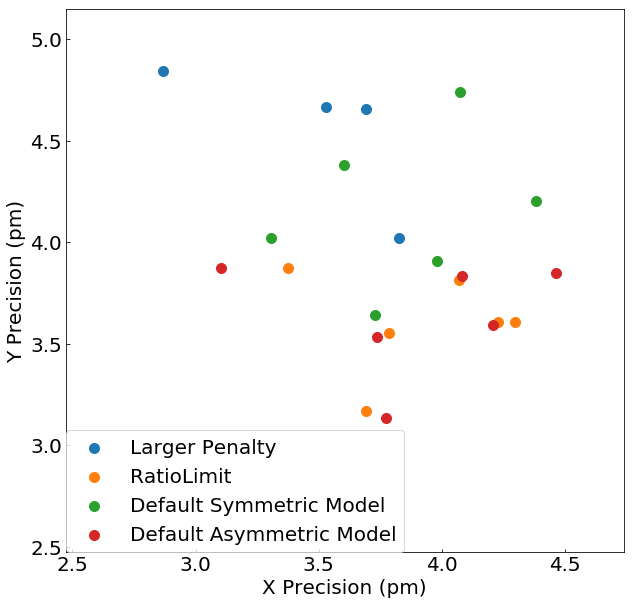

In [9]:
f, axarr = plt.subplots(figsize=(10,10))
axarr.scatter(precision_x[0,:]*20.6,precision_y[0,:]*20.6,s=100,label='Larger Penalty')
axarr.scatter(precision_x[1,:]*20.6,precision_y[1,:]*20.6,s=100,label = 'RatioLimit')
axarr.scatter(precision_x[2,:]*20.6,precision_y[2,:]*20.6,s=100,label='Default Symmetric Model')
axarr.scatter(precision_x[3,:]*20.6,precision_y[3,:]*20.6,s=100,label='Default Asymmetric Model')
axarr.set_xlim([0.12*20.6,0.23*20.6])
axarr.set_ylim([0.12*20.6,0.25*20.6])
axarr.legend(loc='lower left', borderaxespad=0.,prop={'size': 20})
axarr.tick_params(labelsize=20,direction='in')
axarr.set_xlabel('X Precision (pm)',fontsize=20)
axarr.set_ylabel('Y Precision (pm)', fontsize=20)

Text(0, 0.5, 'Y Precision (pm)')

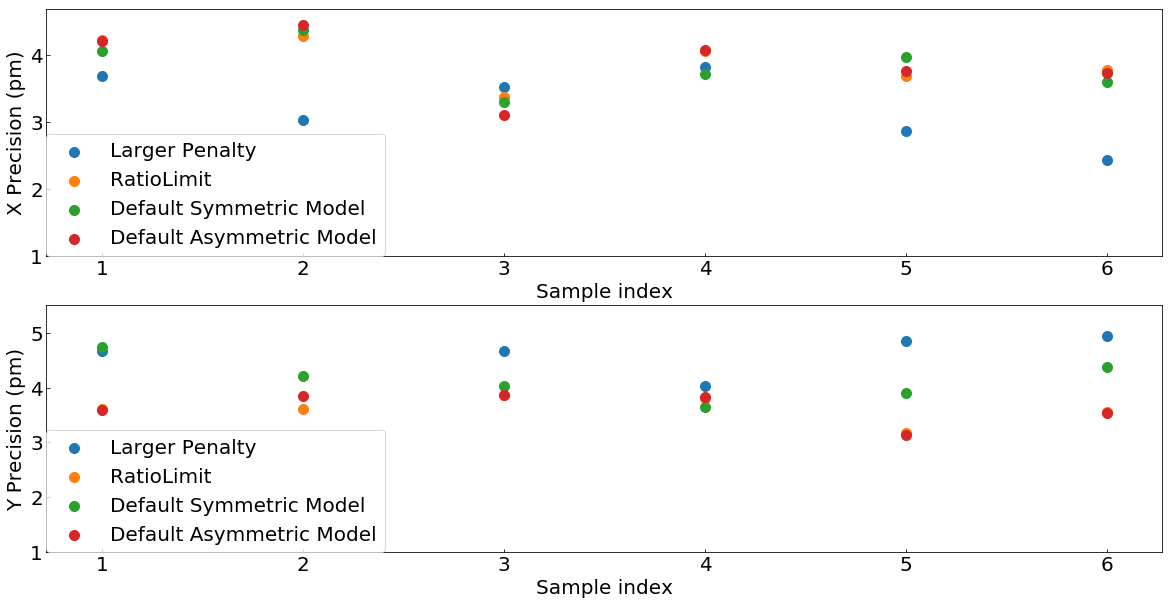

In [26]:
# Plot pairwise result for each method
f, axarr = plt.subplots(2,1,figsize=(20,10))
axarr[0].scatter(np.linspace(1,6,6),precision_x[0,:]*20.6,s=100,label='Larger Penalty')
axarr[0].scatter(np.linspace(1,6,6),precision_x[1,:]*20.6,s=100,label = 'RatioLimit')
axarr[0].scatter(np.linspace(1,6,6),precision_x[2,:]*20.6,s=100,label='Default Symmetric Model')
axarr[0].scatter(np.linspace(1,6,6),precision_x[3,:]*20.6,s=100,label='Default Asymmetric Model')
# axarr.set_xlim([0.12*20.6,0.23*20.6])
axarr[0].set_ylim([1,4.7])
axarr[0].legend(loc='lower left', borderaxespad=0.,prop={'size': 20})
axarr[0].tick_params(labelsize=20,direction='in')
axarr[0].set_xlabel('Sample index',fontsize=20)
axarr[0].set_ylabel('X Precision (pm)', fontsize=20)


axarr[1].scatter(np.linspace(1,6,6),precision_y[0,:]*20.6,s=100,label='Larger Penalty')
axarr[1].scatter(np.linspace(1,6,6),precision_y[1,:]*20.6,s=100,label = 'RatioLimit')
axarr[1].scatter(np.linspace(1,6,6),precision_y[2,:]*20.6,s=100,label='Default Symmetric Model')
axarr[1].scatter(np.linspace(1,6,6),precision_y[3,:]*20.6,s=100,label='Default Asymmetric Model')
# axarr.set_xlim([0.12*20.6,0.23*20.6])
axarr[1].set_ylim([1,5.5])
axarr[1].legend(loc='lower left', borderaxespad=0.,prop={'size': 20})
axarr[1].tick_params(labelsize=20,direction='in')
axarr[1].set_xlabel('Sample index',fontsize=20)
axarr[1].set_ylabel('Y Precision (pm)', fontsize=20)

## Test with rotated frames and only 1 iteration of asymmetric peak

In [2]:
data = np.load('/srv/home/chenyu/JDDC/070319_Test.npy')

[[5.65 3.19 5.67 6.44 5.26 4.34]
 [4.56 2.9  5.74 5.58 5.2  5.5 ]
 [5.93 3.29 4.92 4.58 4.5  4.62]
 [5.79 3.87 4.77 6.72 5.36 4.65]
 [4.17 3.35 5.65 4.72 4.3  4.93]
 [4.63 4.65 6.09 5.54 4.84 4.16]
 [5.02 4.21 6.51 5.01 4.47 6.38]
 [5.87 2.91 4.37 4.97 4.77 4.35]
 [3.94 3.34 4.86 4.23 4.61 5.48]
 [5.43 3.85 4.98 5.26 5.75 5.54]]


/srv/home/chenyu/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


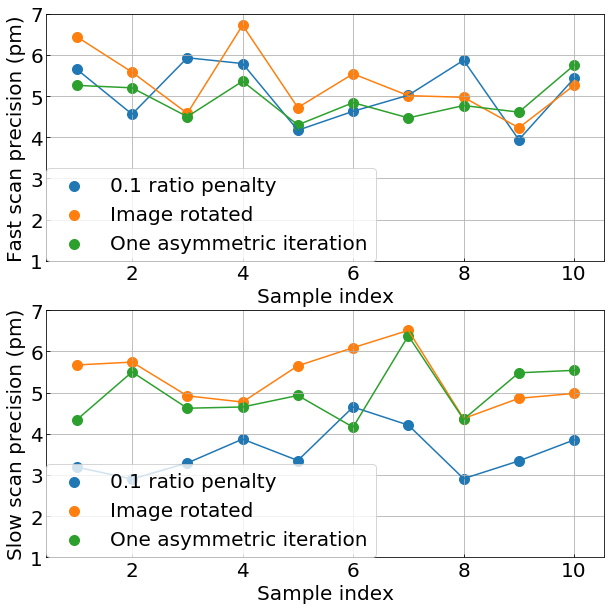

In [21]:
# Plot pairwise result for each method
f, axarr = plt.subplots(2,1,figsize=(10,10))
axarr[0].scatter(np.linspace(1,10,10),data[:,0],s=100,label='0.1 ratio penalty')
axarr[0].scatter(np.linspace(1,10,10),data[:,3],s=100,label = 'Image rotated')
axarr[0].scatter(np.linspace(1,10,10),data[:,4],s=100,label='One asymmetric iteration')
axarr[0].plot(np.linspace(1,10,10),data[:,0])
axarr[0].plot(np.linspace(1,10,10),data[:,3])
axarr[0].plot(np.linspace(1,10,10),data[:,4])

axarr[0].set_ylim([1,7])
axarr[0].legend(loc='lower left', borderaxespad=0.,prop={'size': 20})
axarr[0].tick_params(labelsize=20,direction='in')
axarr[0].set_xlabel('Sample index',fontsize=20)
axarr[0].set_ylabel('Fast scan precision (pm)', fontsize=20)
axarr[0].grid('on')

axarr[1].scatter(np.linspace(1,10,10),data[:,1],s=100,label='0.1 ratio penalty')
axarr[1].scatter(np.linspace(1,10,10),data[:,2],s=100,label = 'Image rotated')
axarr[1].scatter(np.linspace(1,10,10),data[:,5],s=100,label='One asymmetric iteration')
axarr[1].plot(np.linspace(1,10,10),data[:,1])
axarr[1].plot(np.linspace(1,10,10),data[:,2])
axarr[1].plot(np.linspace(1,10,10),data[:,5])

axarr[1].set_ylim([1,7])
axarr[1].legend(loc='lower left', borderaxespad=0.,prop={'size': 20})
axarr[1].tick_params(labelsize=20,direction='in')
axarr[1].set_xlabel('Sample index',fontsize=20)
axarr[1].set_ylabel('Slow scan precision (pm)', fontsize=20)
axarr[1].grid('on')

## Calculate precision for different doses in experiment

In [6]:
Folder_list = ['0.5us','1us','2us','4us','6us','8us','10us']
precision_x = np.zeros((len(Folder_list),10))
precision_y = np.zeros((len(Folder_list),10))
for ifolder in range(len(Folder_list)):
    path = '/srv/home/chenyu/JDDC/Experiment/'+Folder_list[ifolder] +'/'
    for ibatch in range(10):
        file = path + '10Frames_B' + str(ibatch+1) +'_results/bump-0_003-centers.csv'
        csvfile = path + '10Frames_B' + str(ibatch+1) +'_results/bump-0_003-centers.csv'
        txtfile = path + '10Frames_B' + str(ibatch+1) +'_results/bump-0_003.txt'
        if os.path.isfile(csvfile):
#             print(FindPrecision(csvfile,txtfile,1.8,18))
            precision_x[ifolder,ibatch],precision_y[ifolder,ibatch] = FindPrecision(csvfile,txtfile,3.5,18)


In [7]:
precision_x

array([[0.35443878, 0.24910272, 0.19852068, 0.21754914, 0.20009092,
        0.26165532, 0.22409499, 0.27406744, 0.24374236, 0.2017886 ],
       [0.22015596, 0.33602926, 0.18775893, 0.20398112, 0.19917996,
        0.17181563, 0.1848578 , 0.23619918, 0.26947958, 0.16473858],
       [0.12451679, 0.11049485, 0.10389245, 0.16095034, 0.21008906,
        0.15345014, 0.17232898, 0.15184668, 0.14183033, 0.15143302],
       [0.25955058, 0.25411371, 0.28523119, 0.23748657, 0.25531061,
        0.21981266, 0.25888019, 0.21914028, 0.24119484, 0.27602731],
       [0.18624762, 0.18301877, 0.18511686, 0.18980096, 0.19838875,
        0.22462969, 0.18704952, 0.14631508, 0.14965294, 0.17707913],
       [0.19078626, 0.19933101, 0.16358888, 0.16151953, 0.19538958,
        0.17552716, 0.18600367, 0.14555088, 0.18048533, 0.17465367],
       [0.18689399, 0.12000715, 0.12908859, 0.13280166, 0.1346213 ,
        0.15248948, 0.12601283, 0.14053289, 0.16890653, 0.1402508 ]])

/srv/home/chenyu/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


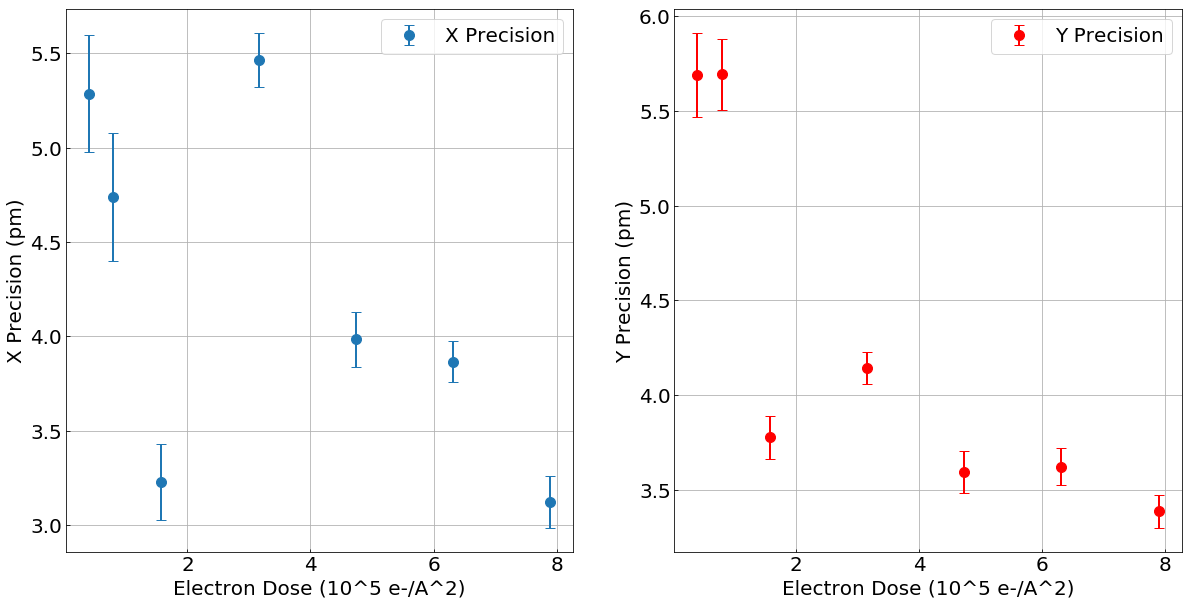

In [39]:
f, axarr = plt.subplots(1,2,figsize=(20,10))
x_avg = np.mean(precision_x,axis=1)
y_avg = np.mean(precision_y,axis=1)

# Report standard deviation of mean (divided by sqrt(# samples))
x_std = np.std(precision_x,axis=1)/sqrt(10)
y_std = np.std(precision_y,axis=1)/sqrt(10)
dtime = [0.5,1,2,4,6,8,10]
dtime = double(dtime)
# Convert dwell time into total electron dose, 394.5e/A^2 per frame under 0.5us dwell time
# Convert mean and std of mean to pm, 1px = 21.8pm
axarr[0].errorbar(dtime*394.5*2*10/10000,x_avg*21.8,yerr=x_std*21.8,fmt='o',label = 'X Precision',capsize=5,
                  markersize = 10,elinewidth = 2)
axarr[0].set_xlabel('Electron Dose (10^5 e-/A^2)',fontsize=20)
axarr[0].tick_params(labelsize=20,direction='in')
axarr[0].grid('on')
axarr[0].set_ylabel('X Precision (pm)', fontsize=20)

axarr[1].errorbar(dtime*394.5*2*10/10000,y_avg*21.8,yerr=y_std*21.8,fmt='o', label = 'Y Precision', c='red',capsize=5, 
                 markersize = 10,elinewidth = 2)
axarr[1].set_xlabel('Electron Dose (10^5 e-/A^2)',fontsize=20)
axarr[1].tick_params(labelsize=20,direction='in')
axarr[1].grid('on')
axarr[1].set_ylabel('Y Precision (pm)', fontsize=20)

axarr[1].legend(loc='upper right', borderaxespad=0.5,prop={'size': 20})
axarr[0].legend(loc='upper right', borderaxespad=0.5,prop={'size': 20})


In [3]:
file = '/srv/home/chenyu/JDDC/Experiment/0.5us/10Frames_B1_results/bump-0_003-centers.csv'
start = 0
with open(file) as csvfile:
    file=csv.reader(open(file,'r'))
    peaks_x = []
    peaks_y = []
    for row in file:
        if start == 0:
            start = 1
            continue
        peaks_x.append(float(row[0]))
        peaks_y.append(float(row[1]))

file = '/srv/home/chenyu/JDDC/Experiment/0.5us/10Frames_B1_results/bump-0_003.txt'
with open(file) as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content];

peaks_int = []
for i in range(len(peaks_x)):
    peaks_int.append(float(content[i*3+2]))
    

Text(0, 0.5, 'Background Std (V)')

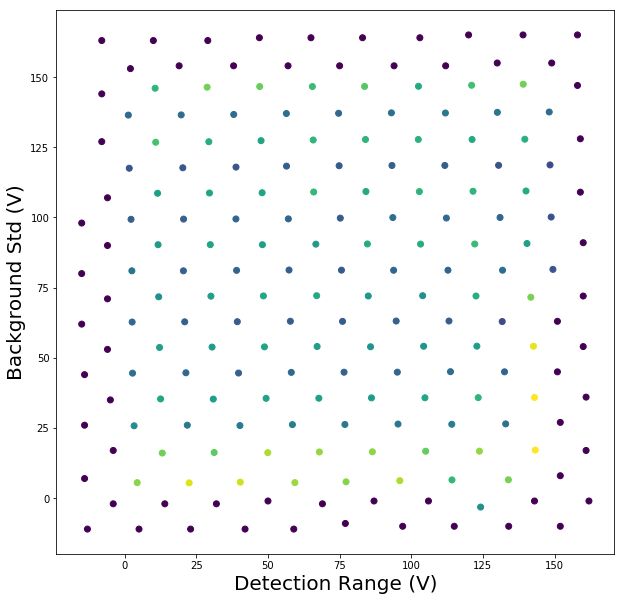

In [4]:
f, axarr = plt.subplots(figsize=(10,10))
axarr.scatter(peaks_x,peaks_y,c=peaks_int)
axarr.set_xlabel('Detection Range (V)',fontsize=20)
axarr.set_ylabel('Background Std (V)',fontsize=20)


Text(0, 0.5, 'Occurance')

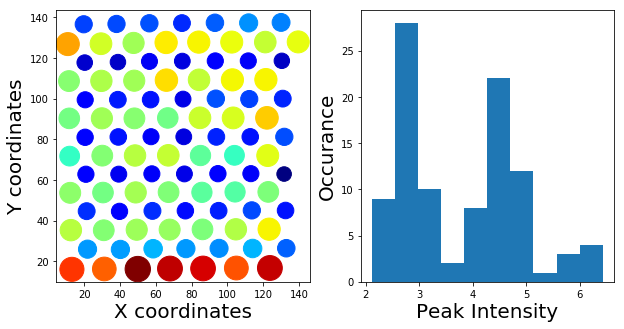

In [5]:
array_x = np.asarray(peaks_x)
array_y = np.asarray(peaks_y)
array_int = np.asarray(peaks_int)
index = np.where((array_x>10) & (array_x<140) & (array_y > 10) & (array_y < 140))
array_x = array_x[index]
array_y = array_y[index]
array_int = array_int[index]

f, axarr = plt.subplots(1,2,figsize=(10,5))
axarr[0].scatter(array_x,array_y,s=array_int*100,c=array_int,cmap='jet')
axarr[0].set_xlabel('X coordinates',fontsize=20)
axarr[0].set_ylabel('Y coordinates',fontsize=20)

axarr[1].hist(array_int)
axarr[1].set_xlabel('Peak Intensity',fontsize=20)
axarr[1].set_ylabel('Occurance',fontsize=20)

In [6]:
threshold = 3.5    # set a threshold to distinguish two sets of sub-lattice
lattice1 = np.where(array_int>threshold)
array_x1 = array_x[lattice1]
array_y1 = array_y[lattice1]
array_int1 = array_int[lattice1]

array_y1_copy = array_y1
array_x1_copy = array_x1

In [7]:
array_y1_copy

array([ 16.2788,  16.5198,  72.0133, 126.962 , 108.793 ,  35.7319,
        53.8908,  16.4642,  90.5503,  72.0361, 127.578 ,  53.6838,
        16.2191,  90.5049,  90.281 ,  16.0813,  90.4811,  71.7236,
       108.7   , 109.061 ,  54.1445, 126.779 ,  72.12  ,  90.5331,
        72.116 ,  35.2998,  71.9545, 109.201 ,  35.8224,  35.7655,
        35.606 ,  54.1133, 108.607 , 127.76  , 109.327 ,  90.2858,
        53.8216,  90.2943,  16.7534,  54.0275,  53.9289,  16.7341,
        35.3525, 127.855 , 109.23  ,  35.5642, 127.76  ,  72.02  ,
       127.769 , 127.34  ])

In [9]:
separation = 18
x_sep = []
while array_x1_copy.size != 0:
    y_cor = array_y1_copy[0]
    index = np.where((array_y1_copy<y_cor+3) & (array_y1_copy>y_cor-3))
    array_x_sub = array_x1_copy[index]
    array_x_sub = np.sort(array_x_sub)
    for i in range(array_x_sub.shape[0]-1):
        spacing = array_x_sub[i+1] - array_x_sub[i]
        if (spacing < separation + 5) & (spacing > separation -5):
            x_sep.append(array_x_sub[i+1] - array_x_sub[i])
    array_x1_copy = np.delete(array_x1_copy,index)
    array_y1_copy = np.delete(array_y1_copy,index)

x_std = np.std(np.asarray(x_sep))
x_mean = np.mean(np.asarray(x_sep))

In [10]:
print(x_mean)

18.42612093023256


Text(0, 0.5, 'Y coordinates')

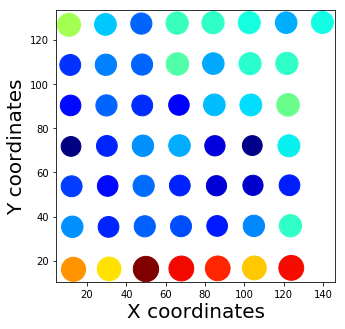

In [11]:
f, axarr = plt.subplots(figsize=(5,5))
axarr.scatter(array_x1,array_y1,s=array_int1*100,c=array_int1,cmap='jet')
axarr.set_xlabel('X coordinates',fontsize=20)
axarr.set_ylabel('Y coordinates',fontsize=20)

# Aux Functions

In [3]:
def FindPrecision(csvFileName,txtFileName,threshold,separation):
    start = 0
    with open(csvFileName) as csvfile:
        file=csv.reader(open(csvFileName,'r'))
        peaks_x = []
        peaks_y = []
        for row in file:
            if start == 0:
                start = 1
                continue
            peaks_x.append(float(row[0]))
            peaks_y.append(float(row[1]))

    with open(txtFileName) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content];

    peaks_int = []
    for i in range(len(peaks_x)):
        peaks_int.append(float(content[i*3+2]))
        
    array_x = np.asarray(peaks_x)
    array_y = np.asarray(peaks_y)
    array_int = np.asarray(peaks_int)
    index = np.where((array_x>10) & (array_x<140) & (array_y > 10) & (array_y < 140))
    array_x = array_x[index]
    array_y = array_y[index]
    array_int = array_int[index]
        
    lattice1 = np.where(array_int>threshold)
    array_x1 = array_x[lattice1]
    array_y1 = array_y[lattice1]
    array_int1 = array_int[lattice1]

    return FindYStd(array_x1,array_y1,separation),FindXStd(array_x1,array_y1,separation)

In [4]:
def FindYStd(array_x1_copy,array_y1_copy,separation):
    y_sep = []
    while array_x1_copy.size != 0:
        x_cor = array_x1_copy[0]
        index = np.where((array_x1_copy<x_cor+3) & (array_x1_copy>x_cor-3))
        array_y_sub = array_y1_copy[index]
        array_y_sub = np.sort(array_y_sub)
        for i in range(array_y_sub.shape[0]-1):
            spacing = array_y_sub[i+1] - array_y_sub[i]
            if (spacing < separation + 5) & (spacing > separation -5):
                y_sep.append(spacing)
        array_x1_copy = np.delete(array_x1_copy,index)
        array_y1_copy = np.delete(array_y1_copy,index)

    y_std = np.std(np.asarray(y_sep))
    return y_std

In [5]:
def FindXStd(array_x1_copy,array_y1_copy,separation):
    x_sep = []
    while array_x1_copy.size != 0:
        y_cor = array_y1_copy[0]
        index = np.where((array_y1_copy<y_cor+3) & (array_y1_copy>y_cor-3))
        array_x_sub = array_x1_copy[index]
        array_x_sub = np.sort(array_x_sub)
        for i in range(array_x_sub.shape[0]-1):
            spacing = array_x_sub[i+1] - array_x_sub[i]
            if (spacing < separation + 5) & (spacing > separation -5):
                x_sep.append(array_x_sub[i+1] - array_x_sub[i])
        array_x1_copy = np.delete(array_x1_copy,index)
        array_y1_copy = np.delete(array_y1_copy,index)

    x_std = np.std(np.asarray(x_sep))
    return x_std